## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import networkx as nx
from scipy.special import gammaln

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Loading Data





In [8]:
# Load the titanic data from a CSV file
#titanic = pd.read_csv('C:/Users/Aqua/Downloads/titanic.csv')
# Load the titanic data from a CSV file
#wine = pd.read_csv('C:/Users/Aqua/Downloads/wine.csv')
wine=pd.read_csv("wine.csv")
titanic=pd.read_csv("titanic.csv")

## Number of DAGs Estimation

In [ ]:
def count_DAGs(n):
    """
    Counts the number of possible DAGs for a given number of nodes n using the Robinson formula.
    :param n: number of nodes in the DAG
    :return: number of possible DAGs
    """
    dp = [0] * (n+1)
    dp[0] = 1
    for i in range(1, n+1):
        for j in range(1, i+1):
            dp[i] += (-1) ** (j+1) * math.comb(i, j) * 2 ** (j * (i-j)) * dp[i-j]
    return dp[n]

# For Our Two Datasets:
num_DAGs_titanic = count_DAGs(8)
num_DAGs_wine = count_DAGs(12)
print("Estimated number of DAGs for the titanic dataset : {}".format(num_DAGs_titanic))
print("Estimated number of DAGs for the wine dataset : {}".format(num_DAGs_wine))

Estimated number of DAGs for the titanic dataset : 783702329343
Estimated number of DAGs for the wine dataset : 521939651343829405020504063


## Titanic : Exploratory Data Analysis

In [ ]:
titanic.head()

,age,portembarked,fare,numparentschildren,passengerclass,sex,numsiblings,survived
0,1,1,1,1,1,1,1,1
1,2,2,1,1,2,2,1,2
2,1,1,1,1,1,2,1,2
3,2,1,1,1,2,2,1,2
4,2,1,1,1,1,1,1,1


In [ ]:
titanic.shape

(889, 8)

In [ ]:
titanic.describe()

,age,portembarked,fare,numparentschildren,passengerclass,sex,numsiblings,survived
count,889.000000,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000
mean,1.696288,1.362205,1.025872,1.11811,1.654668,1.350956,1.059618,1.382452
std,0.567512,0.636157,0.178851,0.35609,0.800467,0.477538,0.268127,0.486260
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,1.000000,1.00000,2.000000,2.000000,1.000000,2.000000
max,3.000000,3.000000,3.000000,3.00000,3.000000,2.000000,3.000000,2.000000


In [ ]:
def heatmap(df):
    sns.set(style="white")
# Create a covariance matrix
    corr = df.corr()
# Creating a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
    cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,annot=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
    ax.set_title('Multi-Collinearity of Features')
    plt.savefig('correlation.png')

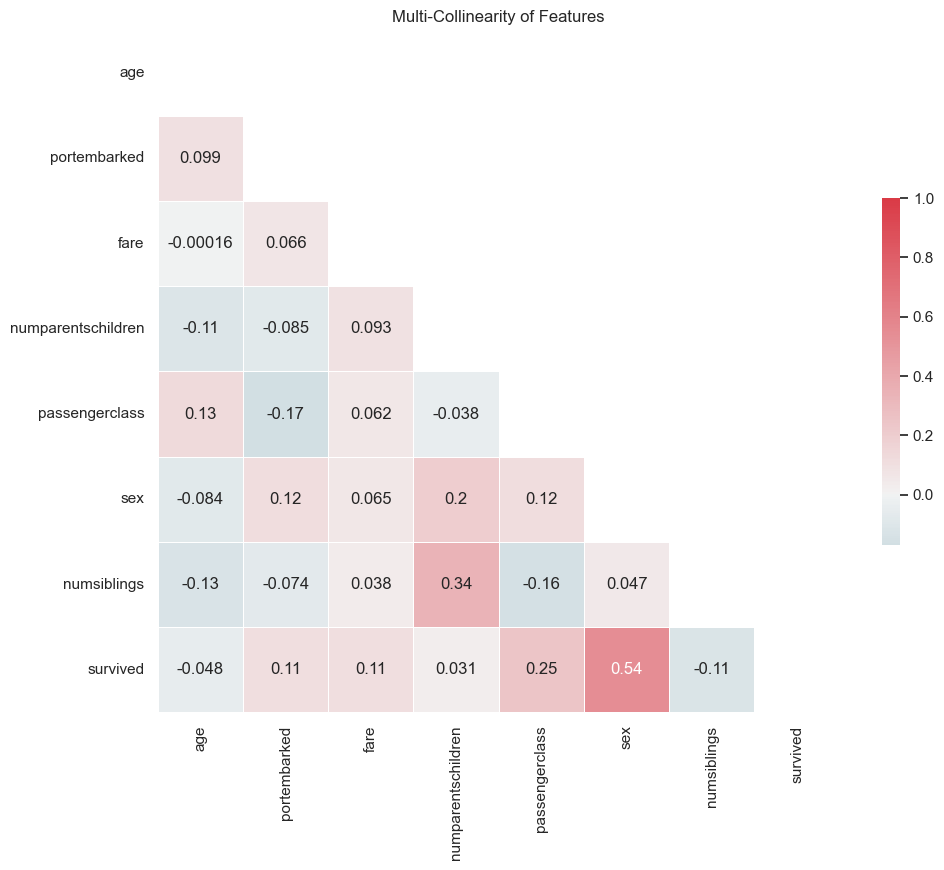

In [ ]:
heatmap(titanic)

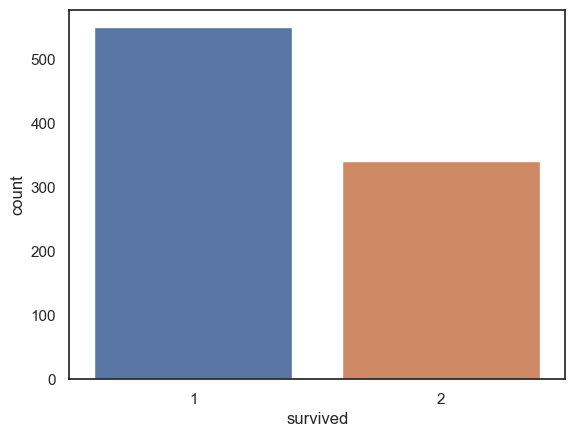

In [ ]:
# 1 didn't survived
# 2 survived
sns.countplot(x=df['survived']);

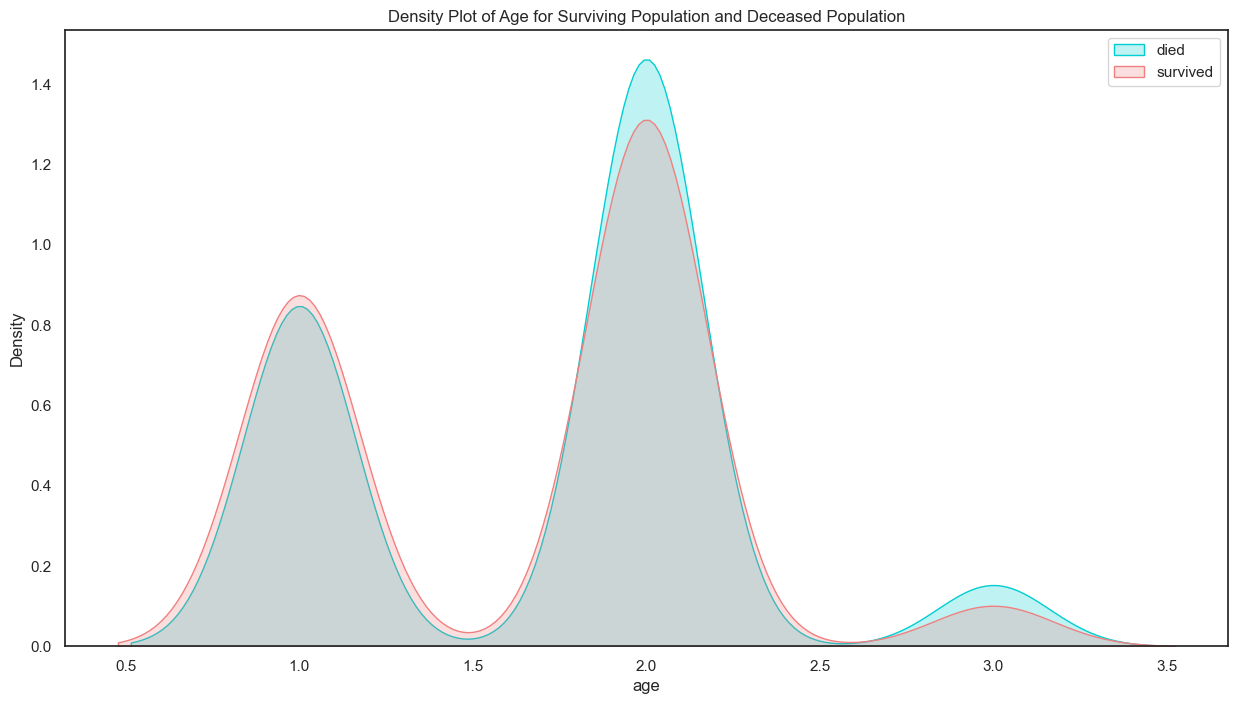

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["age"][titanic.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["age"][titanic.survived == 2], color="lightcoral", shade=True)
plt.legend(['died',"survived"])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
plt.show()

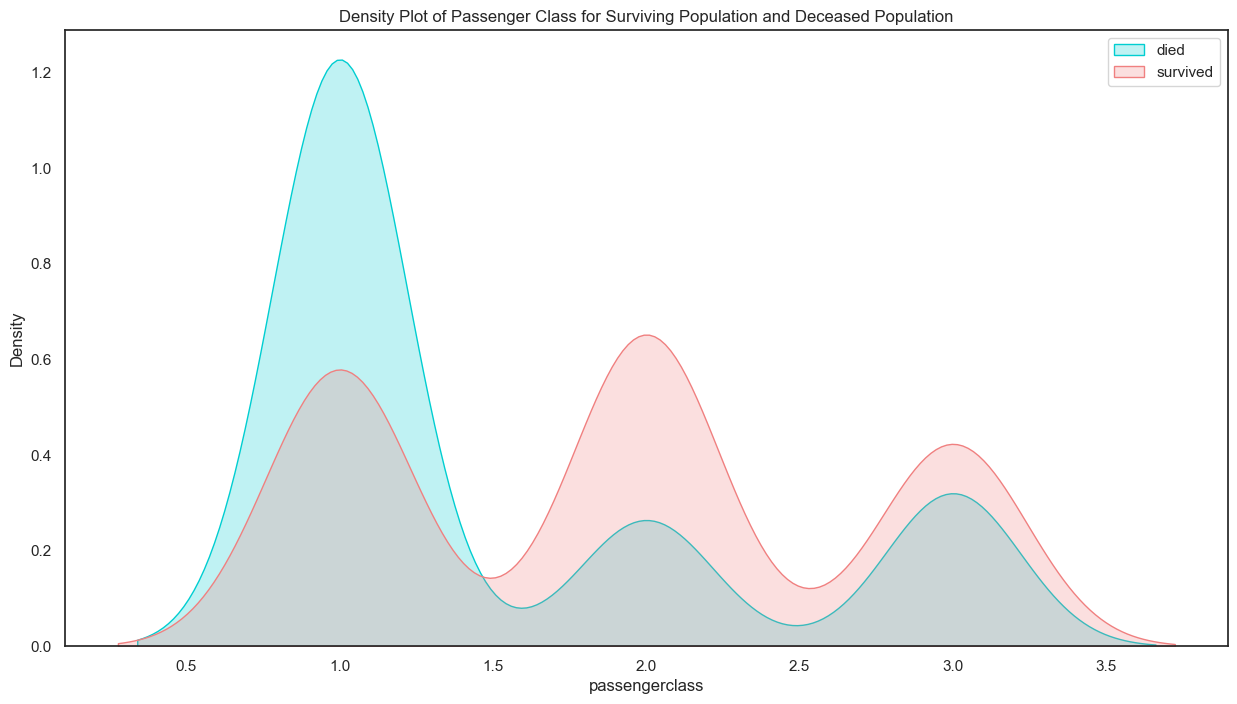

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["passengerclass"][titanic.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["passengerclass"][titanic.survived == 2], color="lightcoral", shade=True)
plt.legend(['died',"survived"])
plt.title('Density Plot of Passenger Class for Surviving Population and Deceased Population')
plt.show()

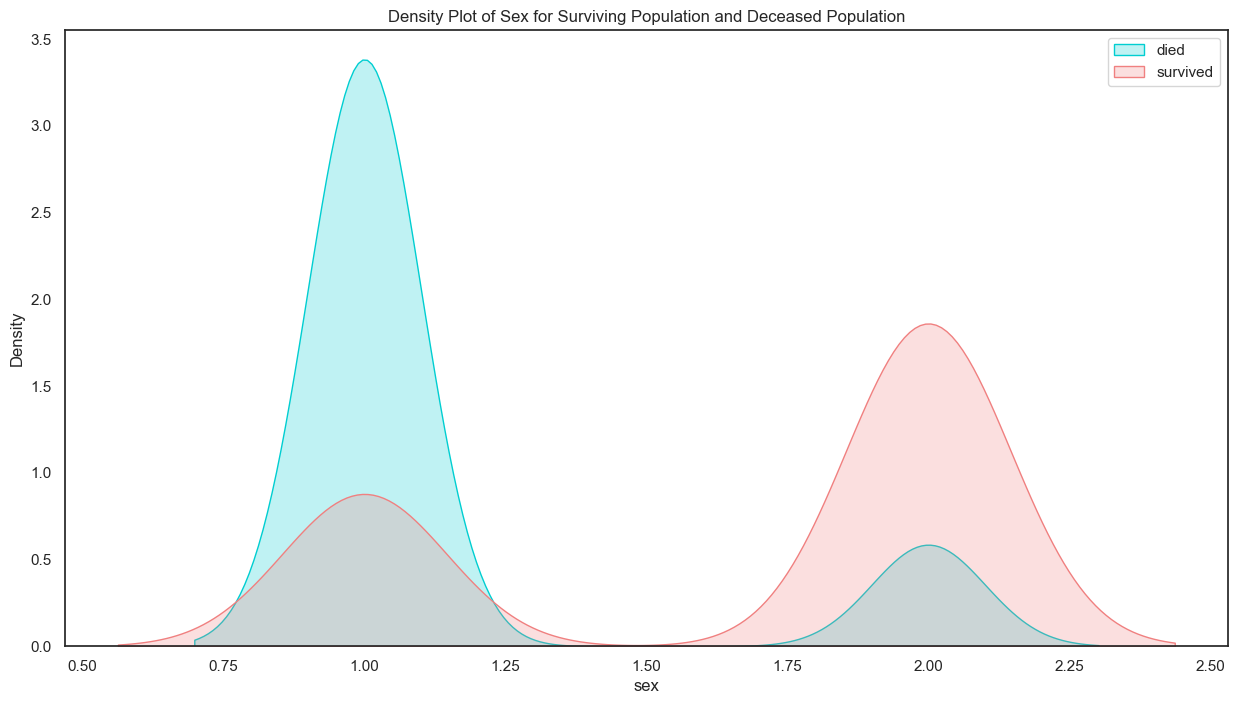

In [ ]:
plt.figure(figsize=(15,8))
sns.kdeplot(df["sex"][titanic.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(df["sex"][titanic.survived == 2], color="lightcoral", shade=True)
plt.legend(['died',"survived"])
plt.title('Density Plot of Sex for Surviving Population and Deceased Population')
plt.show()

## Wine : Exploratory Data Analysis

In [ ]:
wine.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,ph,sulphates,alcohol,quality
0,2,1,2,2,1,1,2,2,2,2,1,3
1,2,2,2,1,1,1,2,1,3,2,2,3
2,3,1,2,1,1,1,2,1,3,2,2,3
3,2,1,1,1,1,1,3,1,3,2,2,3
4,2,1,1,1,1,1,3,1,3,2,2,3


In [ ]:
wine.shape

(4898, 12)

In [ ]:
wine.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,ph,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,2.002246,1.432013,1.436913,1.112087,1.052062,1.080849,2.017967,1.155778,2.648428,2.048183,2.520416,2.880972
std,0.445286,0.588131,0.543588,0.320641,0.297606,0.282201,0.568454,0.367158,0.746456,0.744818,1.043319,0.871532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000
75%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


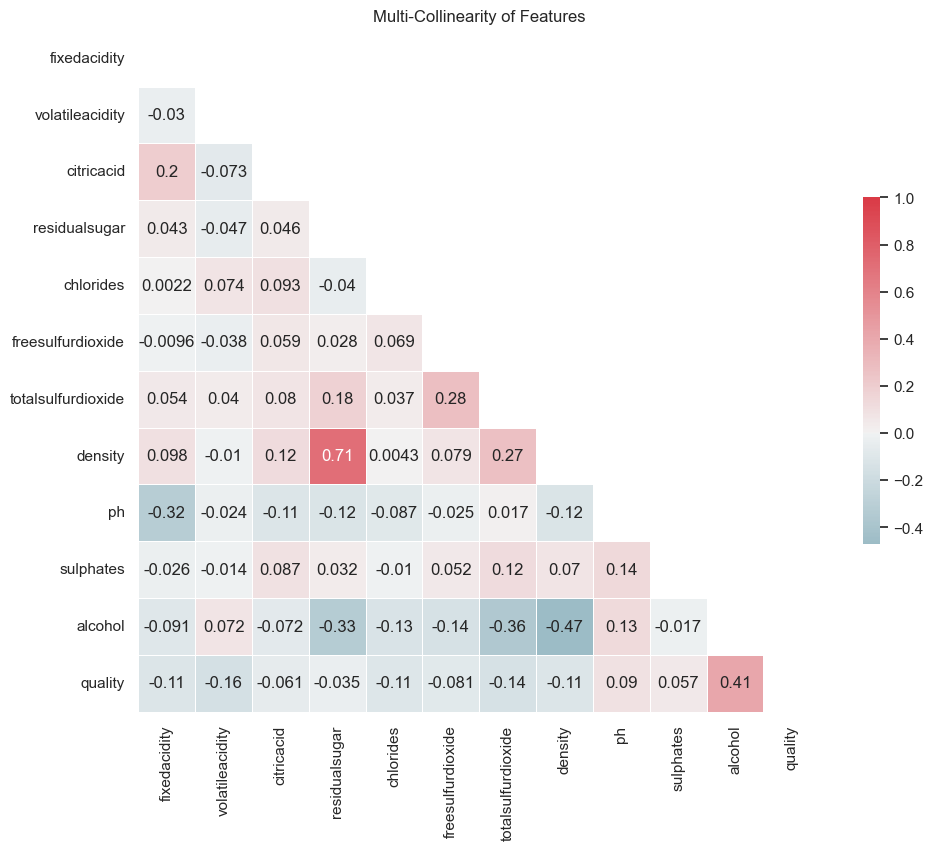

In [ ]:
heatmap(wine)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Fit a decision tree classifier to the data
clf = DecisionTreeClassifier(random_state=0)
X = wine.drop('quality', axis=1)
Y = wine['quality']
model=clf.fit(X, Y)

# Get the feature importance scores
importance_scores = clf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(wine.columns, importance_scores):
    print(f"{feature}: {importance}")


fixedacidity: 0.0841482145255406
volatileacidity: 0.09045340185031257
citricacid: 0.08823884048424702
residualsugar: 0.043153167098832816
chlorides: 0.029015521539601817
freesulfurdioxide: 0.039130076856773145
totalsulfurdioxide: 0.11099316227696072
density: 0.039559610425375195
ph: 0.1468323185675089
sulphates: 0.14633027171362273
alcohol: 0.18214541466122453


## Bayesian Networks Construction And Selection

In [ ]:
from sklearn.model_selection import train_test_split
train_datat, test_datat = train_test_split(titanic, test_size=0.2, random_state=42)
train_dataw, test_dataw = train_test_split(wine, test_size=0.2, random_state=42)

### Calculating CPDs 

In [ ]:
def calc_cpt(df, G, node):
    """Calculates the Conditional Probability Table (CPT) of a given node in the Bayesian network
    represented by the graph G, given the data values in the DataFrame df and the direction of the edges
    in the graph.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data values.
        G (networkx.DiGraph): The directed graph representing the Bayesian network.
        node (str): The name of the node for which to calculate the CPT.

    Returns:
        pd.DataFrame: A DataFrame containing the conditional probabilities of the node given its parents
        and the corresponding probabilities for each value of the node.
    """
    # Get the parents of the node in the graph
    parents = list(G.predecessors(node))

    # Initialize the CPT DataFrame
    cpt_df = pd.DataFrame(columns=[node] + parents + ['prob'])

    # Check if the node has no parents
    if len(parents) == 0:
        for value in df[node].unique():
            prob = len(df.loc[df[node] == value]) / len(df)
            cpt_df = cpt_df.append({node: value, **{parent: None for parent in parents}, 'prob': prob}, ignore_index=True)
        return cpt_df

    # Loop over the possible combinations of parent node values
    for parent_values in pd.DataFrame(df[parents]).drop_duplicates().to_dict(orient='records'):
        # Get the subset of the DataFrame that matches the parent values
        subset_df = df.copy()
        for col, val in parent_values.items():
            subset_df = subset_df.loc[subset_df[col] == val]

        # Calculate the conditional probabilities for the node based on the remaining values
        remaining_values = [col for col in df.columns if col not in parents + [node]]
        for value in df[node].unique():
            prob = len(subset_df.loc[subset_df[node] == value]) / len(df.loc[df[list(parent_values.keys())].eq(list(parent_values.values())).all(axis=1)])
            row_dict = {node: value, **parent_values, 'prob': prob}
            cpt_df = cpt_df.append(row_dict, ignore_index=True)

    return cpt_df

### Approach 1 : Hill Climbing Score-based approach

## Bayesian Dirichlet Score

In [ ]:
def bayesian_score(G, D, cpds):
    """
    Computes the Bayesian score of a DAG G given a dataset D and conditional probability distributions (CPDs).
    G: a directed acyclic graph encoded as a DiGraph object from the networkx package.
    D: a pandas DataFrame containing the dataset.
    cpds: a dictionary where the keys are variables and the values are pandas DataFrames containing the CPDs.
    """
    n = len(G.nodes)
    score = 0
    
    # Compute the value of mij0 for each variable
    mij0 = {}
    for var in G.nodes:
        parents = list(G.predecessors(var))
        pi = D[parents + [var]]
        mij0[var] = pi.groupby(parents + [var]).size()

    # Compute the Bayesian score for each variable
    for var in G.nodes:
        parents = list(G.predecessors(var))
        pij = cpds[var]
        pij.index = pij.index.astype(str)
        pij = pij.loc[:, parents + [var]]
        mij = mij0[var]
        pij_mij = pij.groupby(parents + [var]).size()
        pij_mij = pij_mij.reindex(mij.index, fill_value=0)
        pij_mij = pij_mij + 1
        pij_mij /= pij_mij.sum()
        score += gammaln(pij_mij.values).sum() - gammaln(mij.values + pij_mij.values).sum() + gammaln(mij.values + 1).sum() - gammaln(pij_mij.values + 1).sum()

    return score

## Hill climbing algorithm

In [ ]:
def hillclimbing(D, max_iter=1000):
    # Generate initial DAG
    dags = generate_candidate_dags(D, max_dags=1)
    g = dags[0]

    # Calculate initial score
    cpds = {}
    for node in g.nodes:
        cpds[node] = calc_cpt(D, g, node)
    score = bayesian_score(g, D, cpds)

    iter_count = 0
    while iter_count < max_iter:
        # Get all possible neighbor DAGs
        neighbors = []
        for edge in list(g.edges):
            temp_g = g.copy()
            temp_g.remove_edge(*edge)
            if nx.is_directed_acyclic_graph(temp_g):
                neighbors.append(temp_g)
            temp_g = g.copy()
            temp_g.add_edge(*edge)
            if nx.is_directed_acyclic_graph(temp_g):
                neighbors.append(temp_g)

        # Evaluate neighbor DAGs and select best one
        best_neighbor = None
        best_score = score
        for neighbor in neighbors:
            cpds = {}
            for node in neighbor.nodes:
                cpds[node] = calc_cpt(D, neighbor, node)
            neighbor_score = bayesian_score(neighbor, D, cpds)
            if neighbor_score > best_score:
                best_score = neighbor_score
                best_neighbor = neighbor

        # If no better neighbor, return current DAG
        if best_neighbor is None or best_score <= score:
            return g, score

        # Otherwise, move to best neighbor and repeat
        g = best_neighbor
        score = best_score

        # Increment iteration counter
        iter_count += 1

    # If max_iter is reached, return the current DAG and the final score
    return g, score

## Approach 2 : building different DAGs and choosing one based on the score

## Generating DAGs

In [ ]:
def generate_candidate_dags(data, max_dags=5):
    """
    Generates a list of candidate DAGs from a pandas DataFrame.
    data: a pandas DataFrame containing the data.
    max_dags: the maximum number of DAGs to generate (default 20)
    Returns a list of DAGs encoded as DiGraph objects from the networkx package.
    """
    # Create a complete graph with the same number of nodes as the DataFrame columns
    nodes = list(data.columns)
    complete_graph = nx.DiGraph()
    complete_graph.add_nodes_from(nodes)
    complete_graph.add_edges_from(itertools.product(nodes, nodes))
    
    # Generate up to max_dags DAGs from the complete graph
    dag_list = []
    dag_counter = 0
    for perm in itertools.permutations(nodes):
        dag = nx.DiGraph()
        dag.add_nodes_from(perm)
        for i in range(len(perm)):
            ancestors = list(nx.ancestors(complete_graph, perm[i]))
            ancestors = [a for a in ancestors if a in perm[:i]]
            dag.add_edges_from([(a, perm[i]) for a in ancestors])
        if nx.is_directed_acyclic_graph(dag):
            dag_list.append(dag)
            dag_counter += 1
            if dag_counter >= max_dags:
                break
    
    # Return the list of candidate DAGs
    return dag_list

## Learning the structures of the Bayesian Networks , calculating and sorting the the scores 

In [ ]:
def learn_structure(D):
    # Generate all DAGs
    dags = list(generate_candidate_dags(D))

    # Calculate score for each DAG
    max_score = -np.inf
    max_dag = None
    dag_scores = {}
    for dag in dags:
        g = nx.DiGraph()
        edges = [(parent, child) for (parent, child) in dag.edges]
        g.add_edges_from(edges)
        cpds = {}
        for node in g.nodes:
            cpds[node] = calc_cpt(D, g, node)
        score = bayesian_score(g, D, cpds)
        if score > max_score:
            max_score = score
            max_dag = g
        dag_scores[g] = score

    sorted_scores = sorted(dag_scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_scores, max_dag, max_score

## Visualization of graphs and scores for the two approaches

In [ ]:
def plot_DAG(DAG):
    # Create a layout for the nodes in the graph
    pos = nx.spring_layout(DAG)
    # Draw the nodes and edges
    nx.draw_networkx(
        DAG, 
        pos, 
        with_labels=True, 
        arrowsize=15, 
        font_size=10, 
        node_size=1000, 
        node_color='lightblue',
        node_shape='o',
        linewidths=1.0,
        edge_color='gray',
        arrowstyle='->',
        width=1.0,
        alpha=0.9
    )
    # Set the figure size and show the plot
    plt.figure(figsize=(12, 12))
    plt.show()

In [ ]:
def plot_sorted_DAGs(sorted_scores):
    for i, (DAG, score) in enumerate(sorted_scores):
        print(f"DAG {i+1} (score: {score}):")
        plt.figure(i+1)
        plot_DAG(DAG)

### Titanic dataset

### Approach 1 : Hill Climbing Score-based approach

In [ ]:
g,score=hillclimbing(train_datat, max_iter=1000)

2050.392969642291


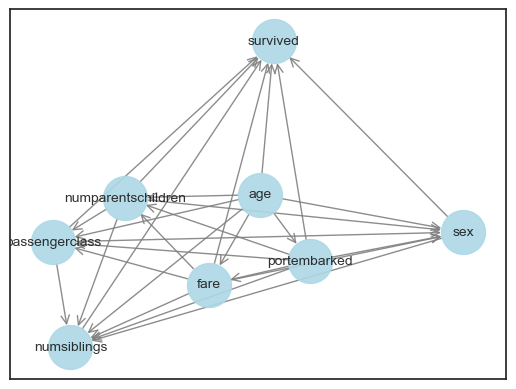

<Figure size 1200x1200 with 0 Axes>

In [ ]:
print(score)
plot_DAG(g)

### Approach 2 : building different DAGs and choosing one based on the score

In [ ]:
generate_candidate_dags(train_datat, max_dags=5)

In [ ]:
sorted_scores, max_dag, max_score=learn_structure(train_datat)

DAG 1 (score: 2153.546944254077):


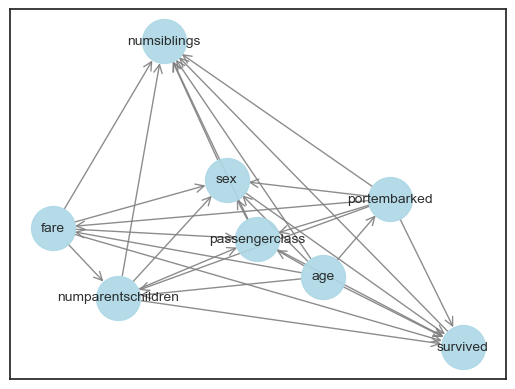

<Figure size 1200x1200 with 0 Axes>

DAG 2 (score: 2127.417069215528):


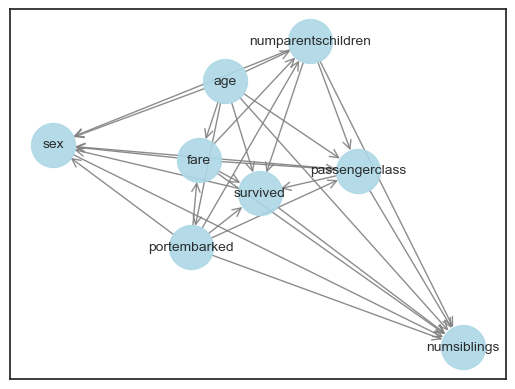

<Figure size 1200x1200 with 0 Axes>

DAG 3 (score: 2050.39296964229):


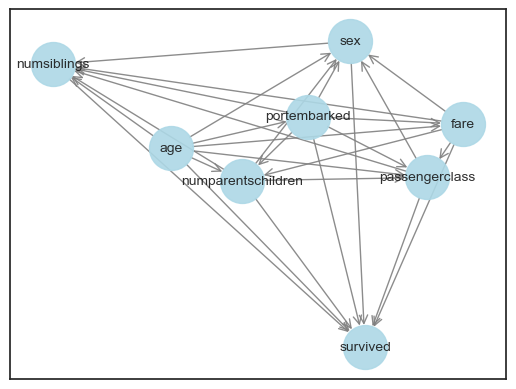

<Figure size 1200x1200 with 0 Axes>

DAG 4 (score: 1905.0536726135128):


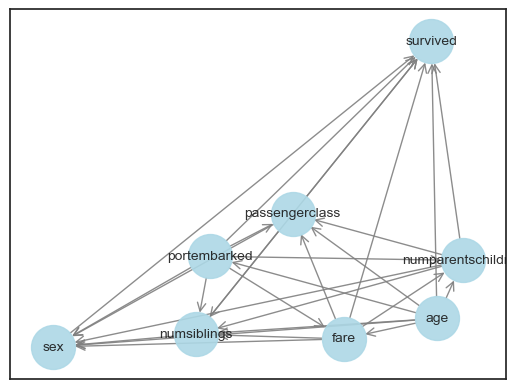

<Figure size 1200x1200 with 0 Axes>

DAG 5 (score: 1862.2514383621497):


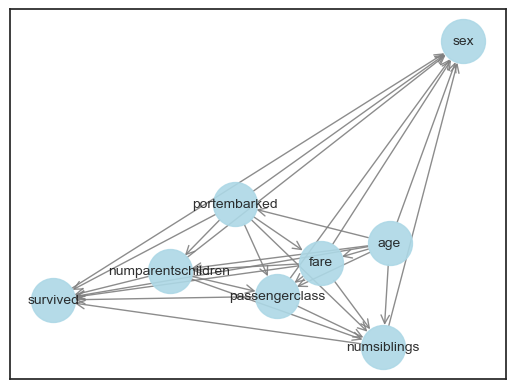

<Figure size 1200x1200 with 0 Axes>

In [ ]:
plot_sorted_DAGs(sorted_scores)

### Wine Dataset

### Approach 1 : Hill Climbing Score-based approach

In [ ]:
w,score_w=hillclimbing(train_dataw, max_iter=100)

In [ ]:
print(score_w)
plot_DAG(w)

### Approach 2 : building different DAGs and choosing one based on the score

In [ ]:
generate_candidate_dags(train_dataw, max_dags=5)

In [ ]:
sorted_scoresw, max_dagw, max_scorew=learn_structure(train_dataw)

DAG 1 (score: 37009.03552212917):


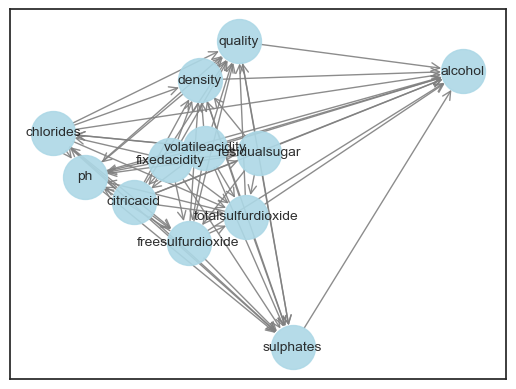

<Figure size 1200x1200 with 0 Axes>

DAG 2 (score: 36828.973541442116):


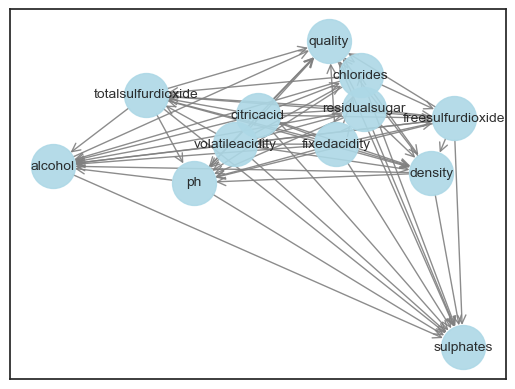

<Figure size 1200x1200 with 0 Axes>

DAG 3 (score: 36473.56528492944):


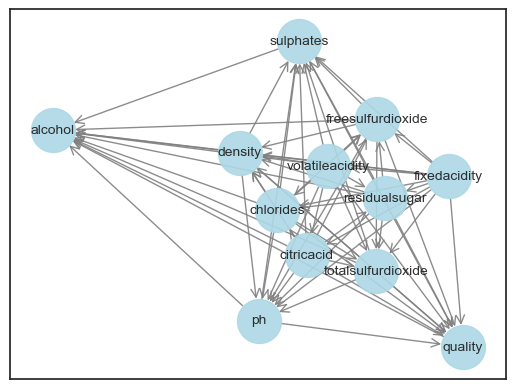

<Figure size 1200x1200 with 0 Axes>

DAG 4 (score: 36270.57956874033):


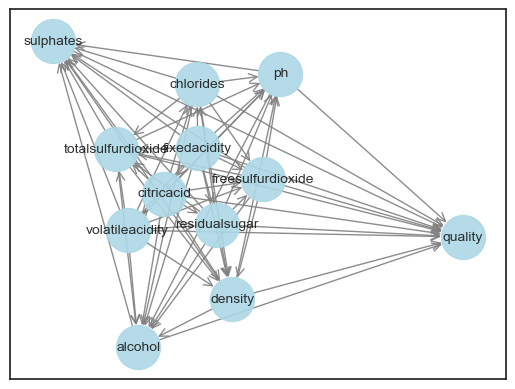

<Figure size 1200x1200 with 0 Axes>

DAG 5 (score: 35997.552410199976):


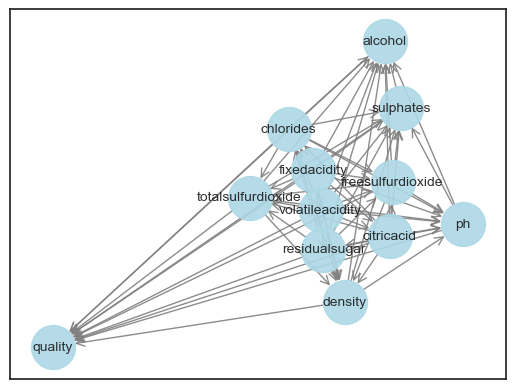

<Figure size 1200x1200 with 0 Axes>

In [ ]:
plot_sorted_DAGs(sorted_scoresw)

## Bayesian Networks Selection

2153.546944254077


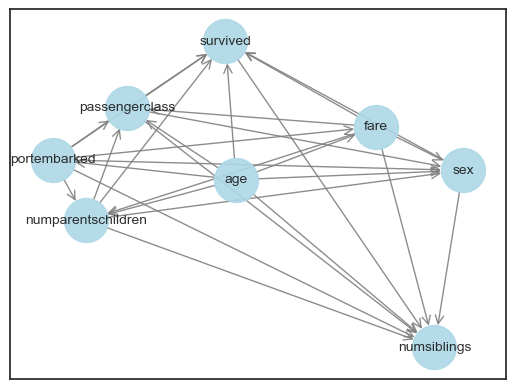

<Figure size 1200x1200 with 0 Axes>

In [ ]:
T= nx.DiGraph(sorted_scores[0][0])
print(sorted_scores[0][1])
plot_DAG(T)
nx.write_graphml(T, "Titanic.gph")

37009.03552212917


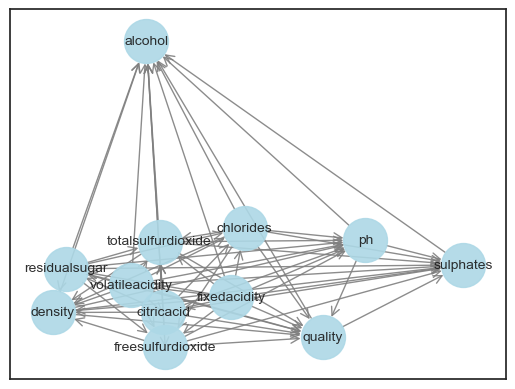

<Figure size 1200x1200 with 0 Axes>

In [ ]:
W= nx.DiGraph(sorted_scoresw[0][0])
print(sorted_scoresw[0][1])
plot_DAG(W)
nx.write_graphml(T, "Wine.gph")

## Classification Using Bayesian Networks

## Titanic

In [ ]:
import itertools

def calc_cpt(df, G, node):
    """Calculates the Conditional Probability Table (CPT) of a given node in the Bayesian network
    represented by the graph G, given the data values in the DataFrame df and the direction of the edges
    in the graph.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data values.
        G (networkx.DiGraph): The directed graph representing the Bayesian network.
        node (str): The name of the node for which to calculate the CPT.

    Returns:
        pd.DataFrame: A DataFrame containing the conditional probabilities of the node given its parents.
    """
    # Get the parents of the node in the graph
    parents = list(G.predecessors(node))

    # Initialize the CPT DataFrame
    cpt_df = pd.DataFrame(columns=[node] + parents)

    # Check if the node has no parents
    if len(parents) == 0:
        for value in df[node].unique():
            prob = len(df.loc[df[node] == value]) / len(df)
            cpt_df = cpt_df.append({node: value, **{parent: None for parent in parents}, 'prob': prob},
                                   ignore_index=True)
        return cpt_df

    # Loop over the possible combinations of parent node values
    for parent_values in pd.DataFrame(df[parents]).drop_duplicates().to_dict(orient='records'):
        # Get the subset of the DataFrame that matches the parent values
        subset_df = df.copy()
        for col, val in parent_values.items():
            subset_df = subset_df.loc[subset_df[col] == val]

        # Calculate the conditional probabilities for the node based on the remaining values
        remaining_values = [col for col in df.columns if col not in parents + [node]]
        for value in df[node].unique():
            # Calculate the probability only if the denominator is non-zero
            denominator = len(df.loc[df[list(parent_values.keys())].eq(list(parent_values.values())).all(axis=1)])
            if denominator == 0:
                prob = 0
            else:
                prob = len(subset_df.loc[subset_df[node] == value]) / denominator
            row_dict = {node: value, **parent_values, 'prob': prob}
            cpt_df = cpt_df.append(row_dict, ignore_index=True)

    return cpt_df




    """
    Calculates the conditional probability tables for each node in the graph given the dataset df.

    Args:
        G (networkx.DiGraph): The directed graph representing the Bayesian network.
        df (pandas.DataFrame): The DataFrame containing the data values.

    Returns:
        dict: A dictionary containing the conditional probability tables for each node in the graph.
    """
cpds = {}
for node in T.nodes:
    cpt = calc_cpt(train_datat, T, node)
    cpds[node] = cpt



In [ ]:
cpds["survived"]

,survived,age,portembarked,fare,numparentschildren,passengerclass,sex,prob
0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.000000
1,1.0,1.0,1.0,1.0,1.0,2.0,2.0,0.000000
2,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.600000
3,1.0,2.0,2.0,1.0,1.0,1.0,2.0,0.400000
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.134615
...,...,...,...,...,...,...,...,...
143,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0.000000
144,2.0,2.0,1.0,1.0,3.0,1.0,1.0,0.000000
145,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.000000
146,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.000000


In [ ]:
def predict(G, cpds, query):
    """Infers the probability of a given query in the Bayesian network represented by the graph G,
    given the conditional probability tables in cpds.

    Args:
        G (networkx.DiGraph): The directed graph representing the Bayesian network.
        cpds (dict): A dictionary containing the conditional probability tables for each node.
        query (dict): A dictionary containing the variable names and their values to query.

    Returns:
        float: The probability of the query in the Bayesian network.
    """
    # Initialize the joint probability to 1
    joint_prob = 1

    # Loop over the nodes in the query
    for node, value in query.items():
        # If the node is in the graph and has parents
        if node in G.nodes and len(list(G.predecessors(node))) > 0:
            # Get the parent nodes and values
            parents = list(G.predecessors(node))
            parent_values = [query[parent] for parent in parents]

            # Find the corresponding row in the CPT for the given parent values
            cpt = cpds[node].loc[(cpds[node][parents] == parent_values).all(axis=1)]

            # Calculate the conditional probability of the node given its parents
            prob = cpt.loc[cpt[node] == value, 'prob'].values[0]

        # If the node is not in the graph or has no parents
        else:
            # Calculate the marginal probability of the node
            prob = cpds[node].loc[cpds[node][node] == value, 'prob'].values[0]

        # Multiply the joint probability by the conditional or marginal probability
        joint_prob *= prob

    return joint_prob


def accuracy(G, cpds, df):
    """Calculates the accuracy of the Bayesian network represented by the graph G,
    given the conditional probability tables in cpds and the data values in the DataFrame df.

    Args:
        G (networkx.DiGraph): The directed graph representing the Bayesian network.
        cpds (dict): A dictionary containing the conditional probability tables for each node.
        df (pandas.DataFrame): The DataFrame containing the data values.

    Returns:
        float: The accuracy of the Bayesian network.
    """
    # Initialize the number of correct predictions to 0
    correct = 0

    # Loop over the rows in the DataFrame
    for i, row in df.iterrows():
        # Get the query dictionary for the row
        query = {'passengerclass': row['passengerclass'], 'sex': row['sex'], 'age': row['age'],"portembarked":row['portembarked'],"fare":row['fare'] ,"numparentschildren":row['numparentschildren'],"survived":row['survived']}


        # Get the actual value of the target variable
        actual = query['survived']

        # Remove the actual value from the query dictionary
        del query['survived']

        # Predict the probability of the query using the inference function
        prob = predict(G, cpds, query)

        # Make a binary prediction based on the predicted probability
        if prob >= 0.5:
            predicted = 2
        else:
            predicted = 1

        # Increment the number of correct predictions if the predicted value matches the actual value
        if predicted == actual:
            correct += 1

    # Calculate the accuracy as the fraction of correct predictions
    accuracy = correct / len(df)

    return accuracy


In [ ]:
accuracy(T,cpds,test_datat)

0.6188466947960619

## Wine

In [ ]:
cpds = {}
for node in W.nodes:
    cpt = calc_cpt(train_dataw, W, node)
    cpds[node] = cpt


In [ ]:
def predict(G, cpds, query):
    # Check that the query variables are valid and exist in the graph
    for var in query.keys():
        if var not in G.nodes:
            raise ValueError(f"Variable {var} not found in the graph")

    # Get the target variable (quality) and remove it from the query
    target = 'quality'
    query_vars = list(query.keys())
    query_vars.remove(target)

    # Initialize the probability distribution for the target variable
    prob_dist = {val: 1 for val in cpds[target].index}

    # For each possible value of the target variable, calculate the joint probability
    for val in cpds[target].index:
        # Create a copy of the query dictionary and add the target value
        new_query = query.copy()
        new_query[target] = val

        # Calculate the joint probability using the chain rule
        joint_prob = 1
        for var in G.nodes:
            parents = list(G.predecessors(var))
            if var == target:
                cpt = cpds[var].loc[val]
            elif len(parents) == 0:
                cpt = cpds[var]
            else:
                parent_values = [new_query[parent] for parent in parents]
                cpt = cpds[var].loc[(cpds[var][parents] == parent_values).all(axis=1)][val]
            joint_prob *= cpt

        # Update the probability distribution for the target variable
        prob_dist[val] *= joint_prob

    # Normalize the probability distribution
    total_prob = sum(prob_dist.values())
    for val in prob_dist.keys():
        prob_dist[val] /= total_prob

    return prob_dist


In [ ]:
def accuracy(G, cpds, df):
    # Get the target variable (quality)
    target = 'quality'

    # Initialize the number of correct predictions and total predictions
    correct = 0
    total = len(df)

    # For each row in the DataFrame, predict the target variable and compare to the true value
    for i, row in df.iterrows():
        # Create a query dictionary from the row values
        query = {'volatileacidity': row['volatileacidity'], 'fixedacidity': row['fixedacidity'], 'chlorides': row['chlorides'], 'citricacid': row['citricacid'], 'residualsugar': row['residualsugar'],'totalsulfurdioxide': row['totalsulfurdioxide'],'freesulfurdioxide': row['freesulfurdioxide'],'density': row['density'],'alcohol': row['alcohol']}


        # Predict the probability distribution for the target variable
        prob_dist = predict(G, cpds, query)

        # Get the predicted value
        pred_val = max(prob_dist, key=prob_dist.get)

        # Get the true value
        true_val = row[target]

        # Update the number of correct predictions
        if pred_val == true_val:
            correct += 1

    # Calculate the accuracy
    acc = correct / total

    return acc


In [7]:
accuracy(W, cpds, test_dataw)

0.539795918367347

## Classification Using Naive Bayes

## Titanic

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(columns=['survived']),titanic['survived'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7921348314606742


## Wine

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.drop(columns=['quality']),wine['quality'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print( accuracy)

0.30918367346938774
